# Atividade: Perceptron para classificação de flores
**INSTITUTO FEDERAL DE MINAS GERIAS**
*Departamento de Engenharia e Computação*

**Professor:** Ciniro Nametala

**Aluno:** Euler Gomes


In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import plotly.graph_objects as go

In [2]:
#funcoes
#funcao degrau bipolar
def degrau_bipolar(x):
    if x > 0:
        y = 1
    elif x < 0:
        y = -1
    return y

#funcao de previsao
def previsao (w,x):
    u = np.dot(w.T,x)
    yhat = degrau_bipolar(u)
    return yhat


# Implementação do Perceptron

## Passo 1

In [3]:
#leitura do dataset
data = pd.read_csv('dataset/dataset_iris.csv', sep=';')

#analise exploratoria
#walker = pyg.walk(dataset)

In [4]:
#quatidade de elementos na amostra
n_amostras = data.shape[0]

#quantidade de variaveis de entrada (subtrair a coluna de tipos)
n_variaveis = data.shape[1] -1

#separando os dados contendo apenas as variaveis de entrada
x = data.iloc[:, 0:n_variaveis].values
print(x)

[[-0.6508  0.1097  4.0009]
 [-1.4492  0.8896  4.4005]
 [ 2.085   0.6876 12.071 ]
 [ 0.2626  1.1476  7.7985]
 [ 0.6418  1.0234  7.0427]
 [ 0.2569  0.673   8.3265]
 [ 1.1155  0.6043  7.4446]
 [ 0.0914  0.3399  7.0677]
 [ 0.0121  0.5256  4.6316]
 [-0.0429  0.466   5.4323]
 [ 0.434   0.687   8.2287]
 [ 0.2735  1.0287  7.1934]
 [ 0.4839  0.4851  7.485 ]
 [ 0.4089 -0.1267  5.5019]
 [ 1.4391  0.1614  8.5843]
 [-0.9115 -0.1973  2.1962]
 [ 0.3654  1.0475  7.4858]
 [ 0.2144  0.7515  7.1699]
 [ 0.2013  1.0014  6.5489]
 [ 0.6483  0.2183  5.8991]
 [-0.1147  0.2242  7.2435]
 [-0.797   0.8795  3.8762]
 [-1.0625  0.6366  2.4707]
 [ 0.5307  0.1285  5.6883]
 [-1.22    0.7777  1.7252]
 [ 0.3957  0.1076  5.6623]
 [-0.1013  0.5989  7.1812]
 [ 2.4482  0.9455 11.2095]
 [ 2.0149  0.6192 10.9263]
 [ 0.2012  0.2611  5.4631]]


In [5]:
#inserindo o bias
bias = np.ones((n_amostras, 1)) * -1

#concatenar o bias com o dataset x
x = np.hstack((x, bias))
print(x)

[[-0.6508  0.1097  4.0009 -1.    ]
 [-1.4492  0.8896  4.4005 -1.    ]
 [ 2.085   0.6876 12.071  -1.    ]
 [ 0.2626  1.1476  7.7985 -1.    ]
 [ 0.6418  1.0234  7.0427 -1.    ]
 [ 0.2569  0.673   8.3265 -1.    ]
 [ 1.1155  0.6043  7.4446 -1.    ]
 [ 0.0914  0.3399  7.0677 -1.    ]
 [ 0.0121  0.5256  4.6316 -1.    ]
 [-0.0429  0.466   5.4323 -1.    ]
 [ 0.434   0.687   8.2287 -1.    ]
 [ 0.2735  1.0287  7.1934 -1.    ]
 [ 0.4839  0.4851  7.485  -1.    ]
 [ 0.4089 -0.1267  5.5019 -1.    ]
 [ 1.4391  0.1614  8.5843 -1.    ]
 [-0.9115 -0.1973  2.1962 -1.    ]
 [ 0.3654  1.0475  7.4858 -1.    ]
 [ 0.2144  0.7515  7.1699 -1.    ]
 [ 0.2013  1.0014  6.5489 -1.    ]
 [ 0.6483  0.2183  5.8991 -1.    ]
 [-0.1147  0.2242  7.2435 -1.    ]
 [-0.797   0.8795  3.8762 -1.    ]
 [-1.0625  0.6366  2.4707 -1.    ]
 [ 0.5307  0.1285  5.6883 -1.    ]
 [-1.22    0.7777  1.7252 -1.    ]
 [ 0.3957  0.1076  5.6623 -1.    ]
 [-0.1013  0.5989  7.1812 -1.    ]
 [ 2.4482  0.9455 11.2095 -1.    ]
 [ 2.0149  0.6192 10

## Passo 2

In [6]:
#associar cada entrada xi com cada saída y
y = data.iloc[:, n_variaveis].values
print(y)

#contar quantas amostras de cada classe existem no dataset
print(f"-1: {(y == -1).sum()}")
print(f"1: {(y == 1).sum()}")

[-1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
-1: 14
1: 16


## Passo 3

In [7]:
#inicializar o vetor de pesos W com valores aleatorios
w = np.random.uniform(-1, 1, n_variaveis + 1)
print(w)

[ 0.95597271 -0.11194165  0.00788094 -0.65565661]


## Passo 4 - 10

In [8]:
#Passo 4: definir a taxa e aprendizagem eta
eta = 0.1

#Passo 5: calcular o número de amostras em x
# já foi feito e está em n_amostras

#Passo 6: definir a tolerancia ao erro
tolerancia = 0.001

#Passo 7: setar o erro inicial maior que a tolerancia
erro_medio = tolerancia + 1

#Passo 8: criar o vetor que ira armazenar o erro de todas as epocas, epoca a epoca
erros_epocas =[]

#Passo 9: inicializa o contador de épocas
epoca = 0

#Passo 10: define o maximo de épocas
max_epocas = 300


## Passo 11 - 26

In [9]:
#Passo 11 e 12: seta criterios de parada
criterio_erro = True
criterio_epocas = True

#Passo 13: enquanto o erro for maior que a tolerancia e max_epocas não for atingido, continue o treino
while criterio_erro == True and criterio_epocas == True:
    #Passo 14: seta o erro da epoca atual com zero no inicio de cada epoca
    erro_atual = 0

    #Passo 15: incrementa o contador de epocas para saber qual epoca a RNA esta
    epoca = epoca + 1

    #Passo 16: embaralha os indices das amostras para treino da rede
    ind_embaralhados =  np.random.permutation(n_amostras)

    #Passo 17: para cada     amostra do conjunto x faça
    for i in range(n_amostras):
        #captura o indice da amostra atual a ser apresentada da RNA
        indice_amostra = ind_embaralhados[i]

        #captura a amostra atual a ser apresentada a RNA
        xi_amostra = x[indice_amostra, :]

        #Passo 18: calcular o potencial de ativacao U
        u = np.dot(w.T, xi_amostra)

        #Passo 19: calcula a saida prevista com base na funcao de ativacao
        yhat = degrau_bipolar(u)

        #Passo 20: calcular o erro entre o valor esperado e o valor previsto
        e = y[indice_amostra] - yhat

        #Passo 21: atualiza os pesos aplicando a regra de hebb
        w = w + (eta * e) * xi_amostra

        #Passo 22: acumulador de erros de todas as amostras
        erro_atual = erro_atual + np.abs(e)

    #Passo 23: calcular o erro medio
    erro_medio = erro_atual / n_amostras

    #Passo 24: armazenar o erro medio da epoca
    erros_epocas.append(erro_medio)

    #Passo 25 e 26: atualizar criterios de erro/parada
    if erro_medio < tolerancia:
        criterio_erro = False
    if epoca > max_epocas:
        criterio_epocas = False


## Plotando a convergencia do algoritimo com base no erro epoca a epoca

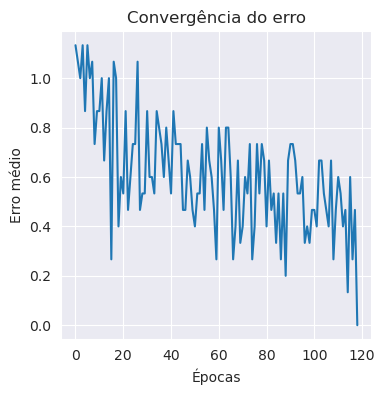

In [10]:
plt.figure(figsize = (4,4))
plt.plot(erros_epocas)
plt.title('Convergência do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro médio')
plt.grid(True)
plt.show()


In [11]:
#exibindo os pesos calibrados pela Regra de Hebb
print('Conjunto ideal de pesos w*')
print(w)

print('Quantidade de épocas necessárias para convergência')
print(epoca)

Conjunto ideal de pesos w*
[  9.61575271  17.29513835  -4.43361906 -18.05565661]
Quantidade de épocas necessárias para convergência
119


In [12]:
#cria um vetor para receber todas as provisoes realizadas pela RNA
yhat = np.zeros(n_amostras)

#armazenar todas as previsoes uma para cada amostra
for i in range(n_amostras):
    yhat[i] = previsao(w, x[i,:])

print(yhat)

[-1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]


# Análise da qualidade de classificação

[[14  0]
 [ 0 16]]


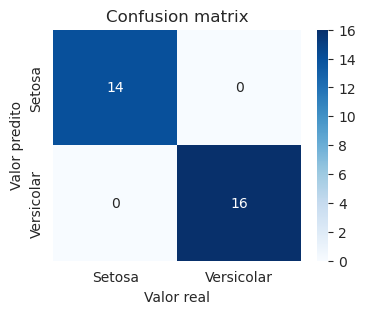

In [13]:
#converter -1 em 0 para melhor visualizar a matriz de confusao
yhat_display = np.where(yhat == -1, 0, yhat)
y_display = np.where(y == -1, 0, y)

#gera matriz de confusao
cm = confusion_matrix(y_display,yhat_display)
print(cm)

#plotar matriz de confusao
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolar'], yticklabels=['Setosa', 'Versicolar'],)
plt.title('Confusion matrix')
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.show()

100.0


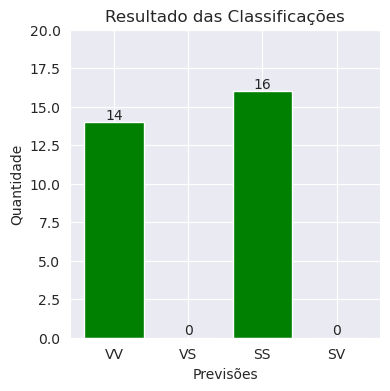

In [14]:
#calculo de acuracia
acuracia = (np.sum(yhat_display == y_display) / n_amostras) * 100
print(acuracia)

if cm.shape == (2, 2):
   resultado = [cm[0, 0], cm[0, 1], cm[1, 1], cm[1, 0]]
   labels = ['VV', 'VS', 'SS', 'SV']
   colors = ['green', 'red', 'green', 'red']

   plt.figure(figsize=(4, 4))
   plt.bar(labels, resultado, color=colors)
   plt.xlabel('Previsões')
   plt.ylabel('Quantidade')
   plt.title('Resultado das Classificações')
   plt.ylim(0, 20)
   for i, v in enumerate(resultado):
      plt.text(i, v + 0.2, str(v), ha='center')
   plt.show()

In [15]:
#criar grafico 3d interativo
colors = ['red' if y == -1 else 'blue' for y in yhat]

#criar malha para o hiperplano
x1_range = np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 20)
x2_range = np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

#calcular x3 para o hiperplano: w0*x1 + w1*x2 + w2*x3 + w3*(-1) = 0
#x3 = (w0*x1 + w1*x2 - w3) / (-w2)
x3_grid = (w[0] * x1_grid + w[1] * x2_grid - w[3]) / (-w[2])

fig = go.Figure()

#adicionar o hiperplano
fig.add_trace(go.Surface(
   x=x1_grid,
   y=x2_grid,
   z=x3_grid,
   colorscale='gray',
   opacity=0.3,
   showscale=False,
   name='Hiperplano'
))

#adicionar os pontos
fig.add_trace(go.Scatter3d(
   x=x[:, 0],
   y=x[:, 1],
   z=x[:, 2],
   mode='markers',
   marker=dict(
      size=8,
      color=colors,
      opacity=0.8,
      line=dict(width=1, color='white')
   ),
   name='Amostras'
))

fig.update_layout(
   title='Classificação',
   scene=dict(
      xaxis_title='x1',
      yaxis_title='x2',
      zaxis_title='x3'
   ),
   width=800,
   height=600
)

fig.show()